In [1]:
import numpy as np
import keras

/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras import backend as K
from keras.layers import Activation
from keras.layers.core import Dense,Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_path = '/home/terminatorash2199/Desktop/flower segregated/train'
test_path = '/home/terminatorash2199/Desktop/flower segregated/test'
valid_path = '/home/terminatorash2199/Desktop/flower segregated/valid'

In [4]:
train_batches = ImageDataGenerator().flow_from_directory(train_path,target_size=(224,224), classes=['daisy','dandelion','rose','sunflower','tulip'],batch_size=5)

Found 2500 images belonging to 5 classes.


In [34]:
test_batches = ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224), classes=['daisy','dandelion','rose','sunflower','tulip'],batch_size=50)

Found 823 images belonging to 5 classes.


In [6]:
valid_batch = train_batches = ImageDataGenerator().flow_from_directory(valid_path,target_size=(224,224), classes=['daisy','dandelion','rose','sunflower','tulip'],batch_size=5)

Found 1000 images belonging to 5 classes.


In [7]:
#taken from github
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [8]:
imgs,labels = next(train_batches)

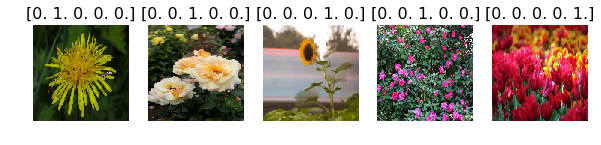

In [9]:
plots(imgs,titles=labels)

we create a cnn with 2 convolution layers but we see that the accuracy is very less

In [10]:
model = Sequential([
    Conv2D(32, (3,3),activation='relu',input_shape=(224,224,3)),
    Conv2D(64, (3,3),activation='relu',input_shape=(224,224,3)),
    Flatten(),
    Dense(5,activation='softmax')
])

In [11]:
model.compile(Adam(lr=.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
model.fit_generator(train_batches, steps_per_epoch=10,validation_data=valid_batch,validation_steps=10,epochs=25,verbose=2)

Epoch 1/25
 - 10s - loss: 14.5685 - acc: 0.0800 - val_loss: 12.8945 - val_acc: 0.2000
Epoch 2/25
 - 8s - loss: 12.5721 - acc: 0.2200 - val_loss: 12.5721 - val_acc: 0.2200
Epoch 3/25
 - 8s - loss: 12.5721 - acc: 0.2200 - val_loss: 11.9274 - val_acc: 0.2600
Epoch 4/25
 - 8s - loss: 12.2498 - acc: 0.2400 - val_loss: 12.5721 - val_acc: 0.2200
Epoch 5/25
 - 8s - loss: 12.8945 - acc: 0.2000 - val_loss: 13.8616 - val_acc: 0.1400
Epoch 6/25
 - 8s - loss: 12.5721 - acc: 0.2200 - val_loss: 13.8616 - val_acc: 0.1400
Epoch 7/25
 - 7s - loss: 11.6050 - acc: 0.2800 - val_loss: 10.9603 - val_acc: 0.3200
Epoch 8/25
 - 7s - loss: 12.2498 - acc: 0.2400 - val_loss: 13.5392 - val_acc: 0.1600
Epoch 9/25
 - 7s - loss: 15.1510 - acc: 0.0600 - val_loss: 12.8945 - val_acc: 0.2000
Epoch 10/25
 - 7s - loss: 11.6050 - acc: 0.2800 - val_loss: 11.9274 - val_acc: 0.2600
Epoch 11/25
 - 7s - loss: 15.1510 - acc: 0.0600 - val_loss: 13.2168 - val_acc: 0.1800
Epoch 12/25
 - 7s - loss: 13.2168 - acc: 0.1800 - val_loss: 12

we create a cnn with 1 convolutional layer but the accuracy is still very less

In [13]:
model1 = Sequential([
    Conv2D(32, (3,3),activation='relu',input_shape=(224,224,3)),
    Flatten(),
    Dense(5,activation='softmax')
])

In [14]:
model1.compile(Adam(lr=.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
model1.fit_generator(train_batches, steps_per_epoch=3,validation_data=valid_batch,validation_steps=4,epochs=30,verbose=2)

Epoch 1/30
 - 1s - loss: 11.8199 - acc: 0.2667 - val_loss: 12.8945 - val_acc: 0.2000
Epoch 2/30
 - 1s - loss: 13.9690 - acc: 0.1333 - val_loss: 13.7004 - val_acc: 0.1500
Epoch 3/30
 - 1s - loss: 12.8945 - acc: 0.2000 - val_loss: 12.8945 - val_acc: 0.2000
Epoch 4/30
 - 1s - loss: 12.8945 - acc: 0.2000 - val_loss: 12.8945 - val_acc: 0.2000
Epoch 5/30
 - 1s - loss: 9.6709 - acc: 0.4000 - val_loss: 13.7004 - val_acc: 0.1500
Epoch 6/30
 - 1s - loss: 11.8199 - acc: 0.2667 - val_loss: 13.7004 - val_acc: 0.1500
Epoch 7/30
 - 1s - loss: 13.9690 - acc: 0.1333 - val_loss: 15.3122 - val_acc: 0.0500
Epoch 8/30
 - 1s - loss: 10.7454 - acc: 0.3333 - val_loss: 12.8945 - val_acc: 0.2000
Epoch 9/30
 - 1s - loss: 11.8199 - acc: 0.2667 - val_loss: 12.0886 - val_acc: 0.2500
Epoch 10/30
 - 1s - loss: 11.8199 - acc: 0.2667 - val_loss: 11.2827 - val_acc: 0.3000
Epoch 11/30
 - 1s - loss: 11.8199 - acc: 0.2667 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 12/30
 - 1s - loss: 13.9690 - acc: 0.1333 - val_loss: 

i decided to use vgg16 which is a cnn created for image classification

In [17]:
vgg16_model = keras.applications.vgg16.VGG16()

In [18]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [19]:
type(vgg16_model)

keras.engine.training.Model

converted vgg16 to  sequential type, remove the last layer and replace it with a dense layer with 5 outputs

In [20]:
model = Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [22]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [24]:
for layer in model.layers:
    layer.trainable = False

In [25]:
model.add(Dense(5,activation='softmax'))

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [27]:
model.compile(Adam(lr=.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [28]:
model.fit_generator(train_batches,steps_per_epoch=4,validation_data=valid_batch,validation_steps=10,epochs=50,verbose=2)

Epoch 1/50
 - 20s - loss: 2.9225 - acc: 0.1500 - val_loss: 2.5080 - val_acc: 0.2400
Epoch 2/50
 - 16s - loss: 2.3496 - acc: 0.2500 - val_loss: 2.0379 - val_acc: 0.3000
Epoch 3/50
 - 16s - loss: 1.3459 - acc: 0.4000 - val_loss: 1.8598 - val_acc: 0.3000
Epoch 4/50
 - 16s - loss: 2.2104 - acc: 0.3000 - val_loss: 1.5726 - val_acc: 0.4000
Epoch 5/50
 - 16s - loss: 1.6627 - acc: 0.3500 - val_loss: 1.8815 - val_acc: 0.4200
Epoch 6/50
 - 16s - loss: 2.1533 - acc: 0.4000 - val_loss: 1.4615 - val_acc: 0.3400
Epoch 7/50
 - 16s - loss: 1.9924 - acc: 0.2500 - val_loss: 1.7618 - val_acc: 0.3800
Epoch 8/50
 - 16s - loss: 2.0312 - acc: 0.3000 - val_loss: 1.6891 - val_acc: 0.4200
Epoch 9/50
 - 16s - loss: 1.8497 - acc: 0.4000 - val_loss: 1.6386 - val_acc: 0.4200
Epoch 10/50
 - 16s - loss: 1.6982 - acc: 0.3000 - val_loss: 1.3659 - val_acc: 0.4000
Epoch 11/50
 - 16s - loss: 0.9934 - acc: 0.6500 - val_loss: 1.4297 - val_acc: 0.5400
Epoch 12/50
 - 16s - loss: 1.8346 - acc: 0.4000 - val_loss: 1.4121 - val_a

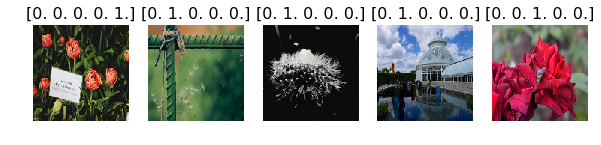

In [29]:
test_imgs , test_labels = next(test_batches)
plots(test_imgs,titles=test_labels)

In [30]:
test_labels = test_labels[:,0]
test_labels

array([0., 0., 0., 0., 0.], dtype=float32)

In [35]:
test_batches = ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224), classes=['daisy','dandelion','rose','sunflower','tulip'],batch_size=50)

Found 823 images belonging to 5 classes.


In [36]:
predictions = model.predict_generator(test_batches,steps=1,verbose=0)

we see that vgg16 has a much greater accuracy and so we use vgg16 for classification of the flowers data set
i have plotted the confusion matrix in an another jupyter notebook because the kernel unexpectedly stoped in the one. sorry for the delay in submission.